# explore notebook for history staar passing rates

In [71]:
import pandas as pd
import prepare as p
import personal_functions as pf
import summarize as s
import explore as e
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200


In [72]:
df = p.clean_df()
df.to_csv('cleaned_data.csv')

In [73]:
df.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0
3,1906002,82.0,80.0,100.0,100.0,96.0,2.9,48.1,58500.0,20.4,1899.0,15043.0,11.9,20.5,59.1,9.8
4,1907001,64.0,66.0,82.0,83.0,83.0,13.8,79.9,52703.0,17.4,1504.0,11129.0,12.2,22.7,59.9,20.8


In [74]:
df.history.max()

100.0

In [75]:
#df.drop(columns= ['school_id', 'english_1', 'english_2', 'algebra', 'biology'], axis= 1, inplace= True)

In [76]:
train, val, test = e.tts(df)

In [77]:
train.shape, val.shape, test.shape

((778, 16), (334, 16), (279, 16))

(array([  1.,   5.,   5.,  21., 126., 222., 238., 145.,  14.,   1.]),
 array([30166. , 34842.7, 39519.4, 44196.1, 48872.8, 53549.5, 58226.2,
        62902.9, 67579.6, 72256.3, 76933. ]),
 <BarContainer object of 10 artists>)

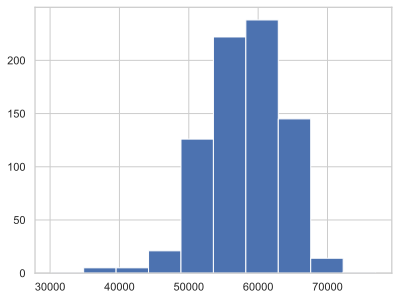

In [78]:
plt.hist(train.salary)

<AxesSubplot:xlabel='history', ylabel='Count'>

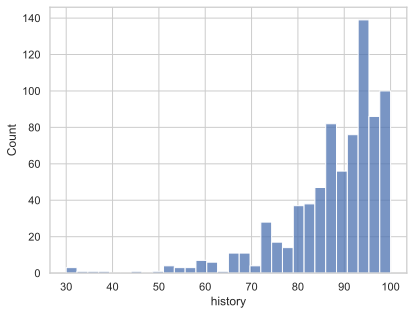

In [79]:
sns.histplot(train.history)

<AxesSubplot:>

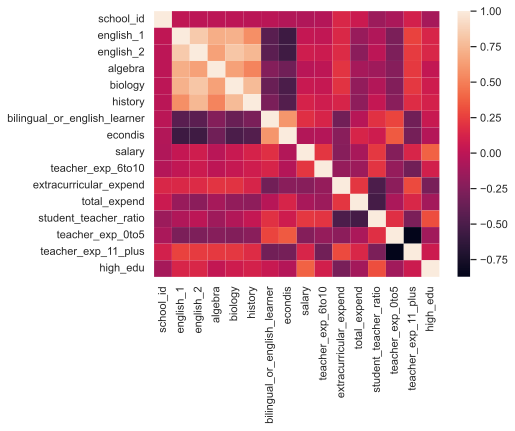

In [80]:
sns.heatmap(df.corr())
# strongest correlation with history scores: econdis, bilingual_or_english_learner
# teacher_exp_0to5
#total expenditures per student
#

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='history'>

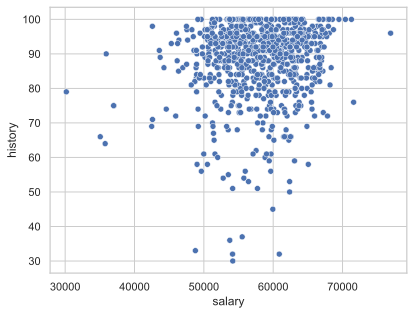

In [81]:
sns.scatterplot(train.salary, train.history)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='econdis', ylabel='history'>

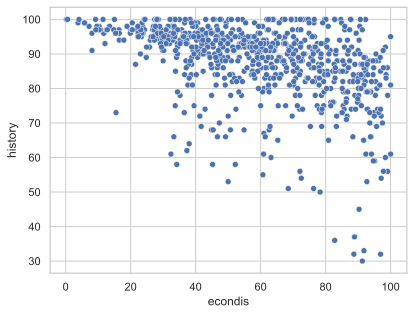

In [82]:
sns.scatterplot(train.econdis, train.history)

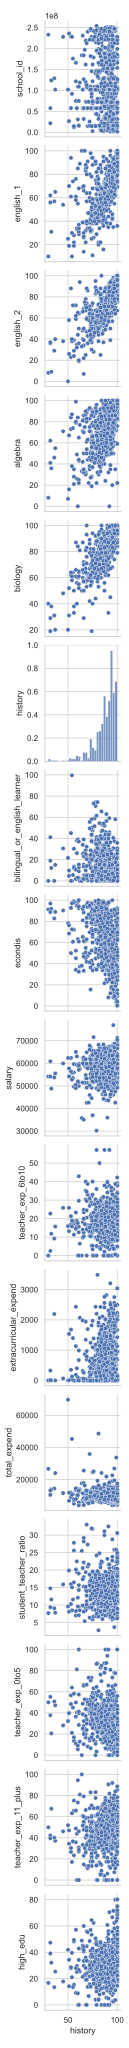

In [83]:
sns.pairplot(train, x_vars= 'history')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='econdis', ylabel='history'>

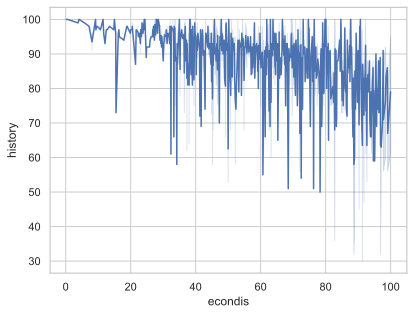

In [84]:
sns.lineplot(train['econdis'], train['history'])

In [85]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
school_id,778.0,1.166658e+08,7.308367e+07,1902001.0,5.790505e+07,1.019125e+08,1.789110e+08,253901001.0
english_1,778.0,6.711568e+01,1.763244e+01,10.0,5.700000e+01,6.800000e+01,8.000000e+01,100.0
english_2,778.0,7.229049e+01,1.638062e+01,0.0,6.300000e+01,7.400000e+01,8.400000e+01,100.0
algebra,778.0,7.323265e+01,1.784067e+01,0.0,6.400000e+01,7.600000e+01,8.600000e+01,100.0
biology,778.0,8.278406e+01,1.377712e+01,19.0,7.600000e+01,8.600000e+01,9.300000e+01,100.0
history,778.0,8.782905e+01,1.102602e+01,30.0,8.400000e+01,9.100000e+01,9.500000e+01,100.0
bilingual_or_english_learner,778.0,1.296581e+01,1.392269e+01,0.0,3.100000e+00,7.950000e+00,1.760000e+01,99.6
econdis,778.0,5.851735e+01,2.337060e+01,0.2,4.052500e+01,5.925000e+01,7.790000e+01,100.0
salary,778.0,5.800434e+04,5.638828e+03,30166.0,5.419300e+04,5.837100e+04,6.223225e+04,76933.0
teacher_exp_6to10,778.0,1.936234e+01,8.024472e+00,0.0,1.452500e+01,1.970000e+01,2.400000e+01,57.1


In [86]:
#getting count of schools in the 75th percentile of economic disadvantage
train[train['econdis'] >= 77.9].count()

school_id                       196
english_1                       196
english_2                       196
algebra                         196
biology                         196
history                         196
bilingual_or_english_learner    196
econdis                         196
salary                          196
teacher_exp_6to10               196
extracurricular_expend          196
total_expend                    196
student_teacher_ratio           196
teacher_exp_0to5                196
teacher_exp_11_plus             196
high_edu                        196
dtype: int64

- Q1: Does higher spending on extracurricular activities lead to higher scores?
- Q2: Do lower percentage of economic disadvantage generally result in higher overall schools?
- Q3: Does higher than bachelor's education make a difference in history staar scores?
- Q4: Do the different levels of teacher experience correlate with higher scores?  Is one of them stronger than the others?


In [87]:
x_axis = ['extracurricular_expend' , 'econdis' , 'high_edu' , 'teacher_exp_0to5' , 'teacher_exp_11_plus']

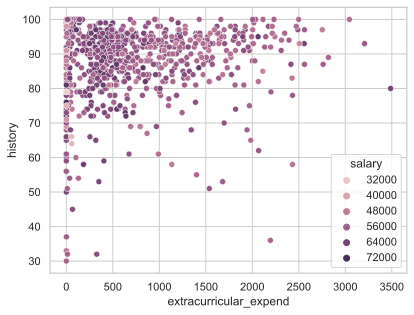

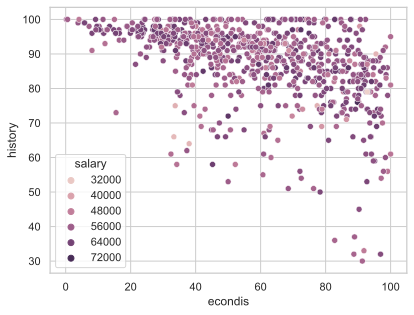

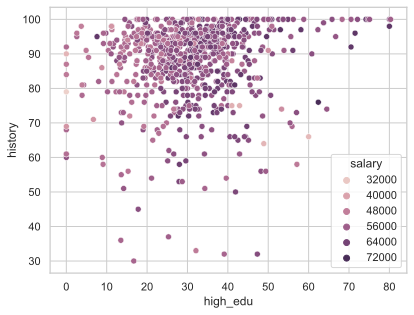

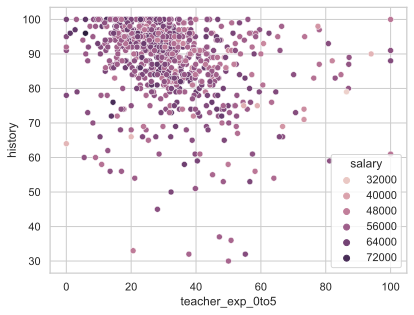

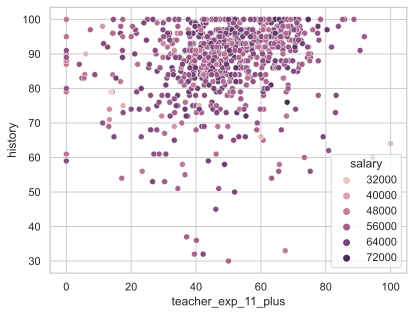

In [88]:
for i in x_axis:
    sns.scatterplot(x= train[i], y= train['history'], data= train, hue= train['salary'])
    plt.show()

In [89]:
train['salary'].mean()

58004.34447300771

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='student_teacher_ratio', ylabel='history'>

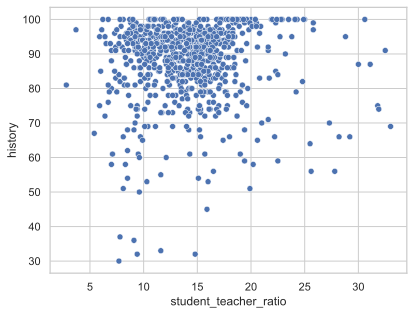

In [90]:
sns.scatterplot(train.student_teacher_ratio, train.history)

<AxesSubplot:xlabel='student_teacher_ratio', ylabel='Count'>

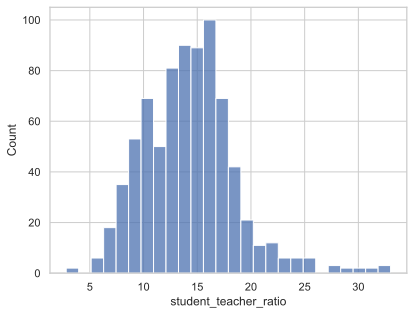

In [91]:
sns.histplot(train.student_teacher_ratio)

In [92]:
#pearson student teach ratio to history 

corr, p = stats.pearsonr(x= train.student_teacher_ratio, y= train.history)
corr, p

(0.03425185441028367, 0.34002347107537545)

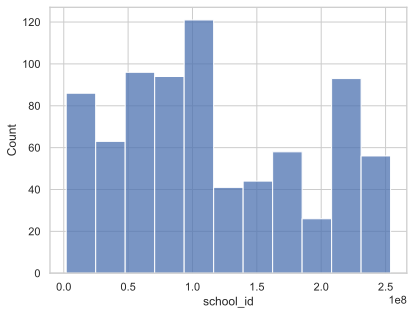

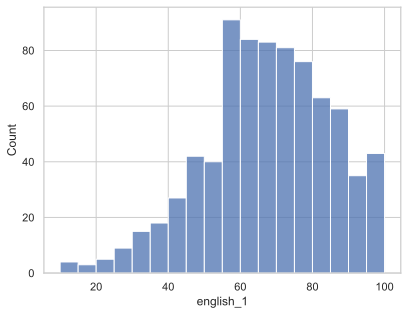

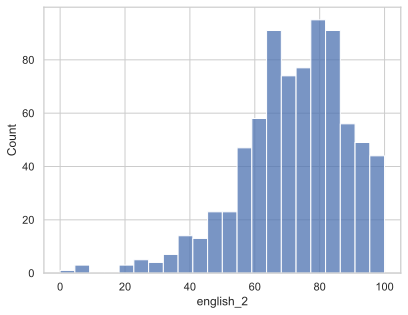

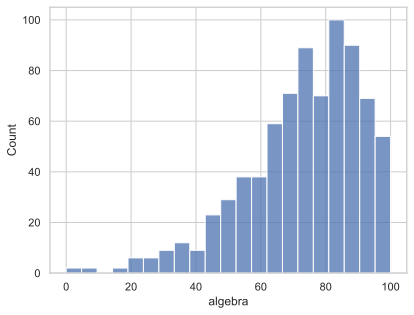

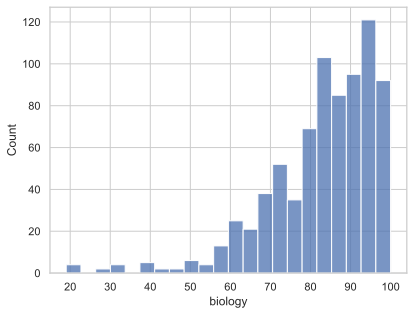

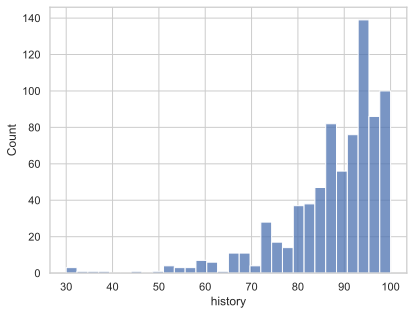

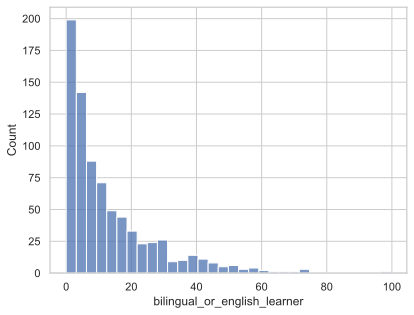

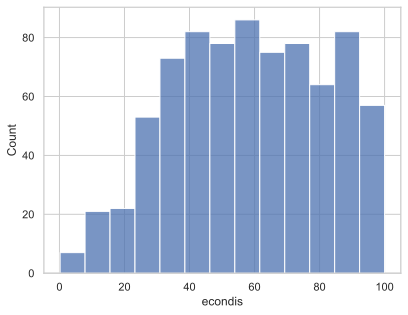

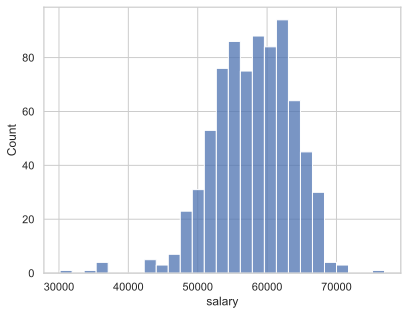

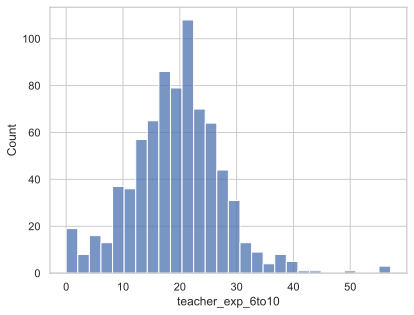

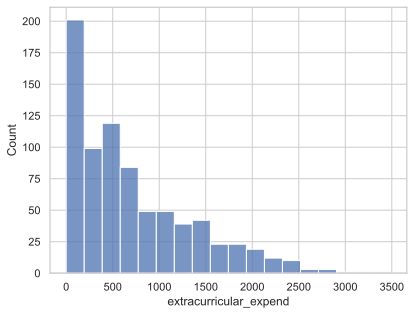

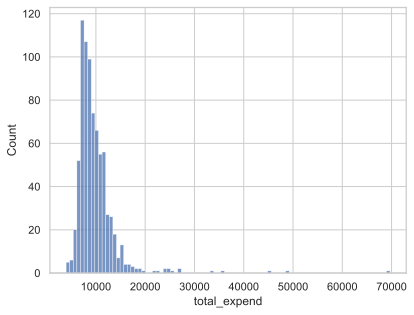

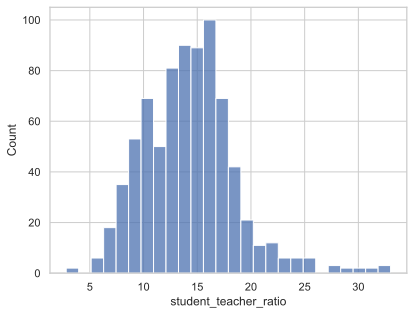

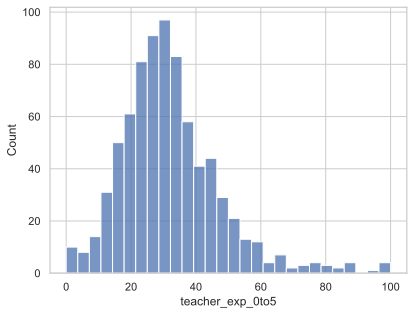

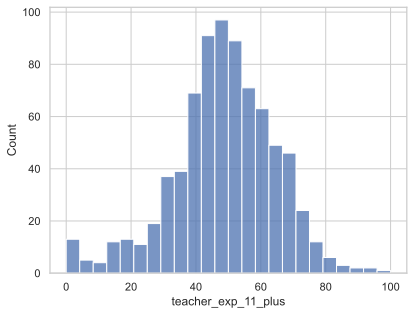

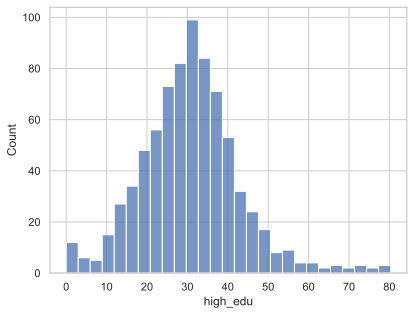

In [93]:
for i in train.columns:
    sns.histplot(train[i])
    plt.show()

In [94]:
# perform pearson's r on all normally distributed features.  look for corr with history

normally_distributed = [['high_edu', 'teacher_exp_0to5', 'teacher_exp_11_plus', 'salary']]

r, p = stats.pearsonr(x= train['high_edu'], y= train['history'])
corr, p
    

(0.03425185441028367, 0.00045092149084829594)

In [95]:
r, p = stats.pearsonr(x= train['teacher_exp_0to5'], y= train['history'])
r, p

(-0.2462405512561904, 3.289253205604054e-12)

In [96]:
r, p = stats.pearsonr(x= train['teacher_exp_11_plus'], y= train['history'])
r, p

(0.18729525673964098, 1.4218825491011975e-07)

In [97]:
r, p = stats.pearsonr(x= train['salary'], y= train['history'])
r, p

(0.11464045301452042, 0.0013598011356173727)

In [98]:
r, p = stats.pearsonr(x= train.student_teacher_ratio, y= train.history)
r, p

(0.03425185441028367, 0.34002347107537545)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 404 to 1056
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   school_id                     778 non-null    int64  
 1   english_1                     778 non-null    float64
 2   english_2                     778 non-null    float64
 3   algebra                       778 non-null    float64
 4   biology                       778 non-null    float64
 5   history                       778 non-null    float64
 6   bilingual_or_english_learner  778 non-null    float64
 7   econdis                       778 non-null    float64
 8   salary                        778 non-null    float64
 9   teacher_exp_6to10             778 non-null    float64
 10  extracurricular_expend        778 non-null    float64
 11  total_expend                  778 non-null    float64
 12  student_teacher_ratio         778 non-null    float64
 13  te

<AxesSubplot:xlabel='student_teacher_ratio', ylabel='history'>

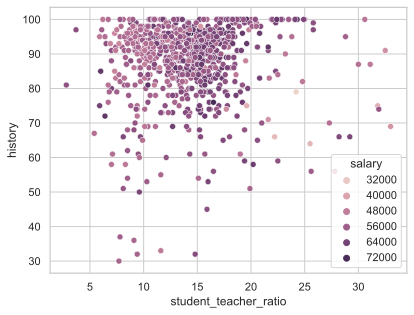

In [100]:
sns.scatterplot( x= train['student_teacher_ratio'], y= train['history'], hue= train['salary'])

In [101]:
r, p = stats.pearsonr(x= train.econdis, y= train.history)
r, p

(-0.4405616626586554, 2.810585738543152e-38)

In [102]:
# pd.read_html('https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_service=appserv&_debug=0&_program=sfadhoc.new_Campus_actual21.sas&which_camp=161920001')

In [103]:
train.to_csv('train.csv')

In [104]:
def correlation_stu_teach_ratio_subject():

    '''    
    This function executes pearson r test testing for correlation 
    between each subject's passing rate and student teacher ratio.
    '''

    subjects = ['english_1', 'english_2', 'algebra', 'biology', 'history']

    data = []
    for i in subjects:

        r, p = stats.pearsonr(x=train.student_teacher_ratio, y=train[i])
        data.append({
                     'subject': i, 
                     'correlation': r, 
                     'p-value': p
                     })
        
    df = pd.DataFrame(data)
    
    return df


In [105]:
stu_teach_ratio = correlation_stu_teach_ratio_subject()
stu_teach_ratio


,subject,correlation,p-value
0,english_1,-0.030873,0.389809
1,english_2,0.017873,0.618645
2,algebra,-0.139289,0.000097
3,biology,-0.046309,0.196944
4,history,0.034252,0.340023


In [106]:
stu_teach_ratio.to_csv('stu_teach_ratio.csv')

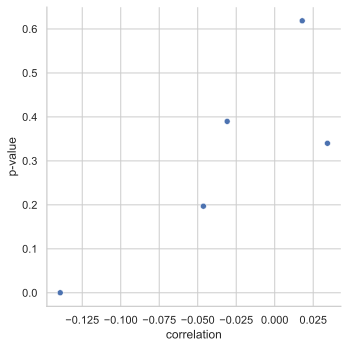

In [107]:
sns.relplot(data= stu_teach_ratio, x= stu_teach_ratio['correlation'], y= stu_teach_ratio['p-value'])

In [108]:
#  Made improved viz in Tableau  #

In [109]:
# pose question
# dataframe to show results of stats test
# show all subjects in one graph
# quick explain dataframe
# takeaway



Is student-teacher ratio related to passing rates?

Performed Pearson's r test on looking for correlation between student-teacher ratios and STAAR passing rates for each subject.  The table and graph below show the results.

,Correlation,p-value
English 1,-0.030873,0.389809
English 2,0.017873,0.618645
Algebra,-0.139289,0.000097
Biology,-0.046309,0.196944
History,0.034252,0.340023


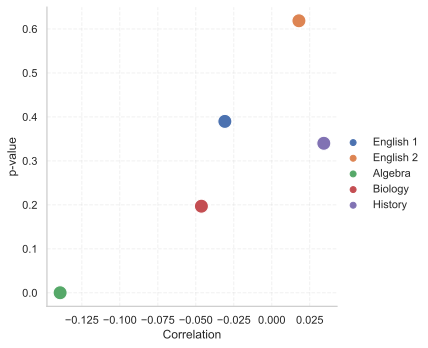

In [110]:
e.correlation_stu_teach_ratio_subject(train)

Takeaway:

There is no significant correlation.

In [111]:
def correlation_stu_teach_ratio_subject(train):

    '''    
    This function executes pearson r test checking for correlation 
    between each subject's passing rate and student teacher ratio
    and plots results.
    '''
    subjects = ['english_1', 'english_2', 'algebra', 'biology', 'history']

    data = []
    
    for i in subjects:

        r, p = stats.pearsonr(x=train.student_teacher_ratio, y=train[i])
        data.append({
                     'Subject': i, 
                     'Correlation': r, 
                     'p-value': p
                     })
        
    df = pd.DataFrame(data)
        #set index to subject
    df = df.set_index('Subject')
        # more readable subject names
    df['Subject'] = ['English 1', 'English 2', 'Algebra', 'Biology', 'History']
        #plot results
    sns.relplot(data= df, x= df['Correlation'], y= df['p-value'])
    
    return df

,Correlation,p-value,Subject
Subject,,,
english_1,-0.030873,0.389809,English 1
english_2,0.017873,0.618645,English 2
algebra,-0.139289,0.000097,Algebra
biology,-0.046309,0.196944,Biology
history,0.034252,0.340023,History


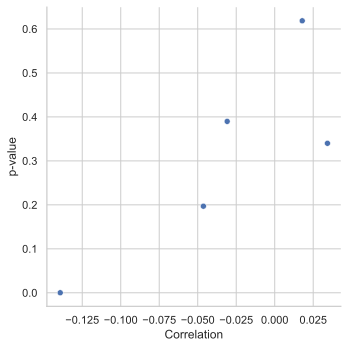

In [112]:
correlation_stu_teach_ratio_subject(train)

In [113]:
train

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,81902002,69.0,79.0,74.0,86.0,93.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,161918001,81.0,71.0,63.0,82.0,89.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,75908001,90.0,90.0,96.0,100.0,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,180901001,63.0,78.0,81.0,94.0,97.0,2.9,91.3,60411.0,3.5,1815.0,26893.0,3.7,26.3,70.2,24.4
1194,183801002,70.0,50.0,70.0,50.0,66.0,1.8,33.3,35060.0,20.0,56.0,4155.0,22.2,20.0,60.0,60.0
1401,227824002,54.0,38.0,71.0,48.0,45.0,30.6,90.3,59949.0,25.8,67.0,11612.0,15.9,28.1,46.1,17.8
985,127904001,69.0,84.0,79.0,87.0,96.0,0.4,44.8,51212.0,3.8,2215.0,11816.0,8.5,28.4,67.7,18.7


In [114]:
#Question 6
def correlation_stu_teach_ratio_subject(train):

    '''    
    This function executes pearson r test checking for correlation 
    between each subject's passing rate and student teacher ratio
    and plots results.
    '''
    subjects = ['english_1', 'english_2', 'algebra', 'biology', 'history']

    data = []
    
    for i in subjects:

        r, p = stats.pearsonr(x=train.student_teacher_ratio, y=train[i])
        data.append({
                     'Subject': i, 
                     'Correlation': r, 
                     'p-value': p
                     })
        
    df = pd.DataFrame(data)
        #set index to subject
    df = df.set_index('Subject')
        # more readable subject names
    df['Subject'] = ['English 1', 'English 2', 'Algebra', 'Biology', 'History']
        #plot results
    sns.relplot(data= df, x= df['Correlation'], y= df['p-value'])
    
    return df

,Correlation,p-value,Subject
Subject,,,
english_1,-0.030873,0.389809,English 1
english_2,0.017873,0.618645,English 2
algebra,-0.139289,0.000097,Algebra
biology,-0.046309,0.196944,Biology
history,0.034252,0.340023,History


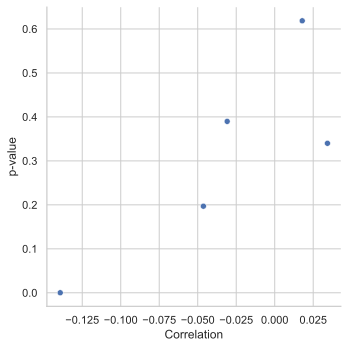

In [115]:
correlation_stu_teach_ratio_subject(train)

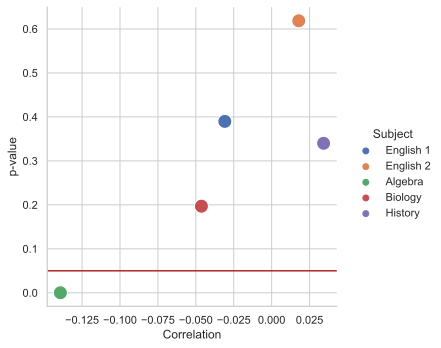

In [116]:
subjects = ['english_1', 'english_2', 'algebra', 'biology', 'history']

data = []
    
for i in subjects:

    r, p = stats.pearsonr(x=train.student_teacher_ratio, y=train[i])
    data.append({
                     'Subject': i, 
                     'Correlation': r, 
                     'p-value': p
                     })
        
df = pd.DataFrame(data)
        #set index to subject
df = df.set_index('Subject')
        # more readable subject names
df['Subject'] = ['English 1', 'English 2', 'Algebra', 'Biology', 'History']
        #plot results
sns.set_theme()
sns.set_style("whitegrid")
graph = sns.relplot(data= df, x= df['Correlation'], y= df['p-value'], hue= 'Subject', s=200)
graph.refline(y= 0.05, color= 'firebrick', linestyle= '-')



